<a href="https://colab.research.google.com/github/Danielstevends/AirTransport/blob/main/final_project_air_transportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Air Transportation Calculator



In [ ]:
# Do this once and you're good
!pip install ipyleaflet
!pip install folium
!pip install googlemaps
!pip install gmplot
# !jupyter nbextension enable --py --sys-prefix gmaps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40712 sha256=f5f0e1a474812ecc5765b2e55e936515ce98c71ebe4676b6f0672df4f8e2466d
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
import matplotlib.pyplot as plt
import folium
import googlemaps
import pandas as pd
import itertools
import gmplot
import webbrowser


from google.colab import output
from datetime import datetime
from IPython.display import display
from ipywidgets import IntSlider, FloatSlider, VBox, interactive_output, Layout, Text, Button
from ipywidgets import Button, HTML, VBox, Text, Label
from ipyleaflet import Map, Marker, Popup, FullScreenControl, MarkerCluster
from itertools import islice

output.enable_custom_widget_manager()  # This is specific for Google Colab to enable widgets
API_KEY = YOUR_API_KEY
# Replace 'YOUR_API_KEY' with your actual Google Maps API key
gmaps = googlemaps.Client(key= API_KEY)

In [ ]:
# Function to get route time and distance for different modes
def get_route_time_distance_all(client, waypoints, mode):
    results = {
        'total_distance': 0,
        'total_duration': 0,
        'distances': []
    }

    for start, end in zip(waypoints, waypoints[1:]):
        response = client.distance_matrix(
            origins=[f"{start[0]},{start[1]}"],
            destinations=[f"{end[0]},{end[1]}"],
            mode=mode
        )

        # Check if 'distance' and 'duration' are available in the response
        elements = response['rows'][0]['elements'][0]

        if 'distance' in elements and 'duration' in elements:
            distance = elements['distance']['value'] / 1000  # Convert meters to kilometers
            duration = elements['duration']['value'] / 60  # Convert seconds to minutes
            results['total_distance'] += distance
            results['total_duration'] += duration
            results['distances'].append(distance)
        else:
            print(f"No route found from {start} to {end} for mode: {mode}")
            return None

    return results

In [ ]:
# Make a dictionary of the geographic coordinates
coordinates = {
 'Point 1': (3.329042673360333, 97.8936767578125),
 'Point 2': (3.4006734206456275, 97.89865493774415),
 'Point 3': (3.562079971717694, 97.7614974975586),
 'Point 4': (3.412154412164427, 97.83496856689455),
 'Point 5': (3.3571472300866163, 97.8655242919922)
 }

# Point 1: [3.329042673360333, 97.8936767578125], Point 2: [3.4006734206456275, 97.89865493774415], Point 3: [3.562079971717694, 97.7614974975586], Point 4: [3.412154412164427, 97.83496856689455], Point 5: [3.3571472300866163, 97.8655242919922]

# Define initial marker positions and labels
positions = list(coordinates.values())
labels = list(coordinates.keys())

No need to bellow code this if you want to use the above sample coordinates:

In [ ]:
# Function to collect coordinates dynamically
def collect_coordinates():
    num_points = int(input("How many coordinates would you like to enter? "))
    coordinates = {}
    for i in range(1, num_points + 1):
        while True:
            coord_input = input(f"Enter coordinates for point {i} in the format 'x,y': ")
            try:
                x, y = map(float, coord_input.strip().split(','))
                coordinates[f"Point {i}"] = (x, y)
                break
            except ValueError:
                print("Invalid input. Please enter two numeric values separated by a comma.")
    return coordinates

# Collecting and validating all coordinates
coordinates = collect_coordinates()

# Define initial marker positions and labels
positions = list(coordinates.values())
labels = list(coordinates.keys())

How many coordinates would you like to enter? 3
Enter coordinates for point 1 in the format 'x,y': 3.329042673360333, 97.8936767578125
Enter coordinates for point 2 in the format 'x,y': 3.4006734206456275, 97.89865493774415
Enter coordinates for point 3 in the format 'x,y': 3.562079971717694, 97.7614974975586


In [ ]:
# Create a map centered around the first set of coordinates
m = Map(center=positions[0], zoom=10)
m.add_control(FullScreenControl())

# Function to create and add a draggable marker to the map with a popup
def add_draggable_marker(lat, lon, label):
    marker = Marker(location=(lat, lon), draggable=True)
    popup = Popup(location=(lat, lon), child=Text(value=label), close_button=False, auto_close=False)
    marker.popup = popup
    m.add_layer(marker)
    return marker

# Create markers with labels
markers = [add_draggable_marker(pos[0], pos[1], label) for pos, label in zip(positions, labels)]

# Button to capture coordinates
capture_button = Button(description="Capture Coordinates")
coordinates_display = Text(value='', description='Captured Coordinates:', disabled=False)

# Function to capture and parse coordinates on button click
def on_button_clicked(x):
    global coordinates  # Ensure it affects the global variable

    # Update the global coordinates dictionary
    for i, label in enumerate(labels):
        coordinates[label] = markers[i].location

    # Update the text widget to display the coordinates
    coord_text = ', '.join([f"{label}: ({loc[0]:.6f}, {loc[1]:.6f})" for label, loc in zip(labels, positions)])
    coordinates_display.value = coord_text
    coordinates_display.layout = Layout(width='100%', height='20px', margin='10px 0 10px 0')

capture_button.on_click(on_button_clicked)

# Display the map and widgets
display(HTML('<strong style="font-size: 32px;">Finalize the Location of the Coordinates</strong>'))
display(VBox([m, capture_button, coordinates_display]))


HTML(value='<strong style="font-size: 32px;">Finalize the Location of the Coordinates</strong>')

Python Dictionary: Stores the coordinates in a Python dictionary, which can be accessed as coordinates['A'], coordinates['B'], and coordinates['C'] respectively.

#### **1. Calculations for the AirTaxi**

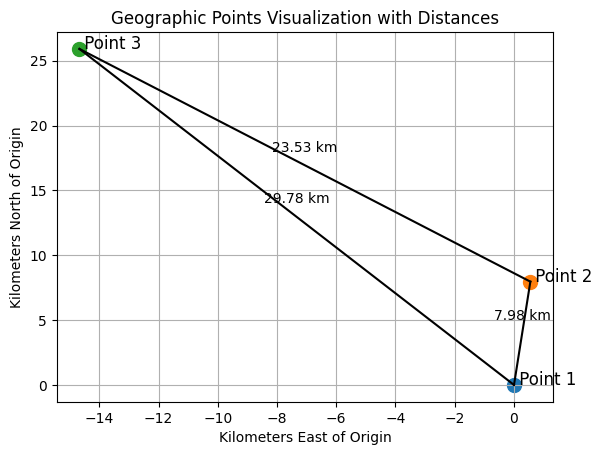

Total loop distance: 61.30 km
Distance between Point 1 and Point 2: 7.98 km
Distance between Point 2 and Point 3: 23.53 km
Distance between Point 3 and Point 0: 29.78 km


In [ ]:
# Function to convert geographic coordinates (lat, lon) to kilometers relative to an origin
def geo_to_km(origin, point):
    R = 6371.0  # Radius of the Earth in kilometers
    lat1, lon1 = origin
    lat2, lon2 = point

    delta_lat = math.radians(lat2 - lat1)
    delta_lon = math.radians(lon2 - lon1)
    a = (math.sin(delta_lat/2))**2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * (math.sin(delta_lon/2))**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c

    # Calculate the bearing angle
    x = math.sin(delta_lon) * math.cos(math.radians(lat2))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(delta_lon)
    bearing = math.atan2(x, y)

    # Convert bearing and distance to kilometers
    km_x = distance * math.sin(bearing)
    km_y = distance * math.cos(bearing)

    return km_x, km_y

# Calculate distances
def calculate_distance(point1, point2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Coordinates in decimal degrees
    lat1, lon1 = point1
    lat2, lon2 = point2

    # Convert decimal degrees to radians
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    # Haversine formula
    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c
    return distance


# Use the first coordinate as the origin for visualization
origin = next(iter(coordinates.values()))

# Transform geographic coordinates to km relative to the origin
km_coordinates = {label: geo_to_km(origin, coord) if coord != origin else (0, 0) for label, coord in coordinates.items()}

# Prepare plot
x_coords, y_coords = zip(*km_coordinates.values())
labels = km_coordinates.keys()

# Plot and label each point
for label, (x, y) in km_coordinates.items():
    plt.scatter(x, y, s=100)
    plt.text(x, y, f' {label}', fontsize=12)

# Draw lines between points and label distances
for (label1, coord1), (label2, coord2) in itertools.combinations(coordinates.items(), 2):
    x1, y1 = km_coordinates[label1]
    x2, y2 = km_coordinates[label2]
    plt.plot([x1, x2], [y1, y2], 'k-')
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    distance = calculate_distance(coord1, coord2)
    plt.annotate(f'{distance:.2f} km', xy=(mid_x, mid_y), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.title('Geographic Points Visualization with Distances')
plt.xlabel('Kilometers East of Origin')
plt.ylabel('Kilometers North of Origin')
plt.show()

# List of waypoints in order
waypoints = list(coordinates.values())

# Loop over waypoints to calculate distances and total distance
distances = []  # List to store distances between consecutive waypoints
total_distance = 0  # Variable to store the total distance

# Iterate over the waypoints to calculate distances between consecutive points
for i in range(len(waypoints)):
    # Get the current waypoint and the next waypoint (with loop back to start)
    current_point = waypoints[i]
    next_point = waypoints[(i + 1) % len(waypoints)]  # Loop back to the first point

    # Calculate the distance between consecutive waypoints
    distance = calculate_distance(current_point, next_point)
    distances.append(distance)  # Add to the list of distances
    total_distance += distance  # Add to the total distance

# Print results
print(f"Total loop distance: {total_distance:.2f} km")

# Print the distance between consecutive points with labels
for i in range(len(distances)):
    label_start = f"Point {i + 1}"
    label_end = f"Point {(i + 2) % (len(distances) + 1)}"
    print(f"Distance between {label_start} and {label_end}: {distances[i]:.2f} km")

In [ ]:
from IPython.display import HTML

display(HTML('<strong style="font-size: 32px;">Visualization of The Air Taxi Route</strong>'))

# Calculate the center of the coordinates
center_lat = sum(lat for lat, lon in coordinates.values()) / len(coordinates)
center_lon = sum(lon for lat, lon in coordinates.values()) / len(coordinates)

# Initialize the map centered at the calculated center
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# Add coordinates markers and draw the route
prev_point = None
first_point = None
for label, point in coordinates.items():
    folium.Marker(location=point, tooltip=label).add_to(m)
    if prev_point:
        folium.PolyLine(locations=[prev_point, point], color='blue').add_to(m)
    else:
        first_point = point  # Store the first point to close the loop later
    prev_point = point

# Close the loop by connecting the last point to the first point
if first_point and prev_point != first_point:
    folium.PolyLine(locations=[prev_point, first_point], color='blue').add_to(m)

# Define custom CSS style for the map placeholder
map_style = """
    <style>
        #map-container {
            display: flex;
            flex-direction: row;
            justify-content: space-between;
            align-items: flex-start;
            width: 100%;
            height: 60%;
        }
        #waypoints-container {
            width: 40%;
            height: 100%;
            overflow-y: auto;
            padding: 10px;
            border: 1px solid #ccc;
        }
    </style>
"""

# List of waypoints in order
waypoints = list(coordinates.values())

# Loop over waypoints to calculate distances and total distance
distances = []  # List to store distances between consecutive waypoints
total_distance = 0  # Variable to store the total distance

# Iterate over the waypoints to calculate distances between consecutive points
for i in range(len(waypoints)):
    # Get the current waypoint and the next waypoint (with loop back to start)
    current_point = waypoints[i]
    next_point = waypoints[(i + 1) % len(waypoints)]  # Loop back to the first point

    # Calculate the distance between consecutive waypoints
    distance = calculate_distance(current_point, next_point)
    distances.append(distance)  # Add to the list of distances
    total_distance += distance  # Add to the total distance

# Build the HTML content for waypoints and distances
waypoints_html = '<h3>Waypoints</h3><ul>'
for i, (label, point) in enumerate(coordinates.items()):
    waypoints_html += f'<li><strong>{label}:</strong> {point}</li>'
waypoints_html += '</ul>'

distances_html = '<h3>Distances</h3><ul>'
for i, distance in enumerate(distances):
    label_start = f"Point {i + 1}"
    label_end = f"Point {(i + 2) % (len(distances) + 1)}"
    distances_html += f'<li><strong>{label_start} to {label_end}:</strong> {distance:.2f} km</li>'
distances_html += f'<li><strong>Total loop distance:</strong> {total_distance:.2f} km</li>'
distances_html += '</ul>'

# Display the map and waypoints/distances
HTML(map_style + f'<div id="map-container">{m._repr_html_()}<div id="waypoints-container">{waypoints_html}{distances_html}</div></div>')

#### **2. Calculations for the Personal Car**

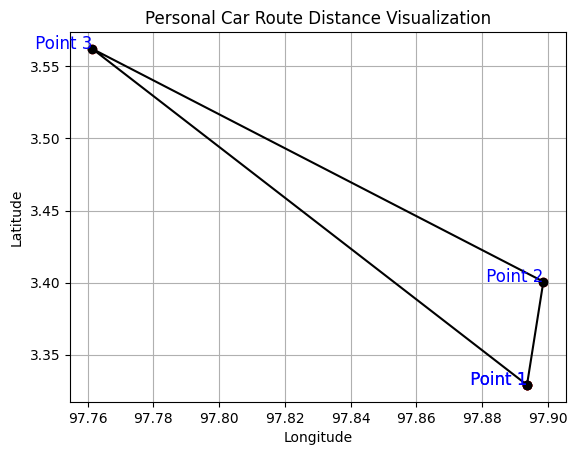

Total loop distance: 76.65 km
Estimated travel time: 128.00 minutes
Distance from Point 1 to Point 2: 13.76 km
Distance from Point 2 to Point 3: 27.29 km
Distance from Point 3 to Point 1: 35.60 km


In [ ]:
# Function to plot the route with lines and labels for variable waypoints
def plot_route(waypoints, labels):
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Extract longitude and latitude from waypoints
    longitudes, latitudes = zip(*waypoints)

    # Plot the waypoints with lines
    ax.plot(latitudes, longitudes, marker='o', linestyle='-', color='k')  # Connect waypoints with lines
    ax.scatter(latitudes, longitudes, color='red')  # Highlight waypoints

    # Annotate waypoints with corresponding labels
    for label, (lon, lat) in zip(labels, waypoints):
        ax.text(lat, lon, f' {label}', color="blue", fontsize=12, ha='right')

    # Set graph title and labels
    ax.set_title('Personal Car Route Distance Visualization')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

    # Show the plot
    plt.show()


# Create a loop by adding the first point to the end of the list
waypoints = list(coordinates.values())
waypoints.append(waypoints[0])  # This creates the loop
labels = list(coordinates.keys())
labels.append(labels[0])  # To ensure proper labeling in the loop

# Call the function with the waypoints and labels
plot_route(waypoints, labels)

results = get_route_time_distance_all(gmaps, waypoints, mode = 'driving')

# Display results
if results['distances']:
    print(f"Total loop distance: {results['total_distance']:.2f} km")
    print(f"Estimated travel time: {results['total_duration']:.2f} minutes")
    for i, distance in enumerate(results['distances']):
        label_start = labels[i]
        label_end = labels[(i + 1) % len(labels)]
        print(f"Distance from {label_start} to {label_end}: {distance:.2f} km")

Showing the actual track of the ground transportation:

In [ ]:
def plot_route(coordinates):
    # Extract waypoints and their coordinates
    waypoints = list(coordinates.values())

    # Request directions
    directions_result = gmaps.directions(waypoints[0], waypoints[-1], waypoints=waypoints[1:-1], mode="driving", departure_time=datetime.now())

    # Extract the polyline encoded string
    polyline = directions_result[0]['overview_polyline']['points']

    # Use googlemaps package to decode the polyline
    decoded_polyline = googlemaps.convert.decode_polyline(polyline)

    # Extract latitudes and longitudes from the decoded polyline
    latitudes, longitudes = zip(*[(point['lat'], point['lng']) for point in decoded_polyline])

    # Create a gmplot map
    gmap = gmplot.GoogleMapPlotter(latitudes[0], longitudes[0], zoom=13)

    # Plot the route
    gmap.plot(latitudes, longitudes, edge_width=10)

    # Add waypoints markers
    for label, (lat, lon) in coordinates.items():
        gmap.marker(lat, lon, label=label)

    # Draw the map to an HTML file
    gmap.draw("route.html")

        # Open the file in the default web browser
    webbrowser.open_new_tab("route.html")  # Open in a new tab

plot_route(coordinates)

#### **3. Calculations for the Transit**

In [ ]:
# List of waypoints
waypoints = list(coordinates.values())
waypoints.append(waypoints[0])  # Close the loop

# Get transit route distance and duration
results_transit = get_route_time_distance_all(gmaps, waypoints, mode="transit")

if results_transit and results_transit['distances']:
    print(f"Total loop distance for transit: {results_transit['total_distance']:.2f} km")
    print(f"Estimated travel time for transit: {results_transit['total_duration']:.2f} minutes")
    for i, distance in enumerate(results_transit['distances']):
        label_start = f"Point {i + 1}"
        label_end = f"Point {(i + 2) % len(labels)}"
        print(f"Distance from {label_start} to {label_end}: {distance:.2f} km")


No route found from (3.329042673360333, 97.8936767578125) to (3.4006734206456275, 97.89865493774415) for mode: transit


#### **4. Calculations for the Walking**

In [ ]:
# Get walking route distance and duration
results_walking = get_route_time_distance_all(gmaps, waypoints, mode="walking")

if results_walking and results_walking['distances']:
    print(f"Total loop distance for walking: {results_walking['total_distance']:.2f} km")
    print(f"Estimated travel time for walking: {results_walking['total_duration']:.2f} minutes")
    for i, distance in enumerate(results_walking['distances']):
        label_start = f"Point {i + 1}"
        label_end = f"Point {(i + 2) % len(labels)}"
        print(f"Distance from {label_start} to {label_end}: {distance:.2f} km")

Total loop distance for walking: 75.09 km
Estimated travel time for walking: 1017.23 minutes
Distance from Point 1 to Point 2: 13.76 km
Distance from Point 2 to Point 3: 27.21 km
Distance from Point 3 to Point 0: 34.12 km


In [ ]:
# Initialize variables
a = total_distance # distances in miles
d = 200  # speed in kph
e = 100  # price per charging
f = 4   # number of passengers per air taxi
g = 100 # distance per charging
h = 10 # km / liter
i = 20 # number of passengers per vehicle
j = 1 # Price per liter for gasoline
k = 330  # Airtaxi Emission per km
l = 2680 # Bus Emission per km


# Function to calculate outputs
def calculate(d, e, f, g, h, i, j, k, l):
    total_distance = a
    x = total_distance / d * 60 # time to destination
    z = total_distance / g  # total fuel used
    y = (z * e) / f  # price per person
    return x, y, z

# Function to handle slider changes
def update_plot(d, e, f, g, h, i, j, k, l):
    global a, x, y, z
    x, y, z = calculate(d, e, f, g, h, i, j, k, l)

    total_fuel = results['total_distance'] / h
    price_per_person_ground = total_fuel * j / i

    print(f"")
    print(f"Comparison between Air Taxi vs Public Transportation: ")
    print(f"")

    # Create a dictionary with comparison parameters
    comparison_data = {
        'Parameter': ['Total Distance', 'Travel Time (minute)', 'Price Per Person', 'Battery Used (%)', 'Fuel Used (l)', 'Total Emission (kg CO2)', 'Emission per Person  (kg CO2 / person)'],
        'Air Taxi': [total_distance, x, y, 100*z, '-', k*total_distance/1000, k*total_distance/(f*1000) ],
        'Ground Transportation': [results['total_distance'], results['total_duration'], price_per_person_ground, '-', total_fuel, l*results['total_distance']/1000, l*results['total_distance']/(i*1000) ]
    }

    # Convert the dictionary to a DataFrame
    comparison_df = pd.DataFrame(comparison_data)

    # Display the DataFrame as a table
    display(comparison_df)


# Custom layout to increase the left margin
slider_layout = Layout(width='500px', margin='0px 0px 0px 0px')  # Adjust the margin as needed

# Sliders with custom layout
d_slider = IntSlider(min=0, max=120, step=5, value=d, description='Average Speed:', layout=slider_layout)
e_slider = FloatSlider(min=1.0, max=200, step=0.1, value=e, description='Charging Price:', layout=slider_layout)
f_slider = IntSlider(min=1, max=10, step=1, value=f, description='No. of Persons (Air taxi):', layout=slider_layout)
g_slider = IntSlider(min=1, max=200, step=1, value=g, description='Km per charge:', layout=slider_layout)
h_slider = IntSlider(min=1, max=30, step=1, value=h, description='Km per Liters:', layout=slider_layout)
i_slider = IntSlider(min=1, max=50, step=1, value=i, description='No. of Persons (Ground Transport):', layout=slider_layout)
j_slider = FloatSlider(min=0.0, max=10, step=0.1, value=j, description='Fuel Price per Liter:', layout=slider_layout)
k_slider = FloatSlider(min=0.0, max=1000, step=0.1, value=k, description='Emission per km (AirTaxi):', layout=slider_layout)
l_slider = FloatSlider(min=0.0, max=8000, step=0.1, value=l, description='Emission per km (Ground Transport):', layout=slider_layout)

print(f"")
display(HTML('<strong style="font-size: 24px;">Calculations Based on the Given Circumstances and Coordinates:</strong>'))
print(f"")

blank_space = widgets.Box(layout=Layout(height='20px'))
message_label1 = Label('Play with the sliders (Speed, Charging Price, No. of Persons, and Km per charging) to change Air Taxi Variables:',
                      layout=Layout(margin='10px 0 10px 0'))  # Margin: top, right, bottom, left
message_label2 = Label('Play with the sliders (Km per Liters, No. of Persons, and Fuel Price per Liter) to change Ground Transport Variables:',
                      layout=Layout(margin='10px 0 10px 0'))  # Margin: top, right, bottom, left

# Widget interaction
ui = widgets.VBox([message_label1, d_slider, e_slider, f_slider, g_slider, k_slider, message_label2, h_slider, i_slider, j_slider, l_slider])
out = widgets.interactive_output(update_plot, {'d': d_slider, 'e': e_slider, 'f': f_slider, 'g': g_slider, 'k': k_slider, 'h': h_slider, 'i': i_slider, 'j': j_slider, 'l': l_slider})
display(ui, out)

Output()

In [ ]:
###### END ########